<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ignacio Maximiliano Jimenez Ramirez y Daniel Pastrana Vargas

**Fecha:** 28 de septiembre del 2023.

**Expediente** : *** y 733982.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/DPastranaV/Tarea5_DPastrana_IJimenez

# Tarea 5: Clase 10

In [5]:
# Librería de optimización 
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# %matplotlib notebook
%matplotlib inline

## Ejercicios

Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.


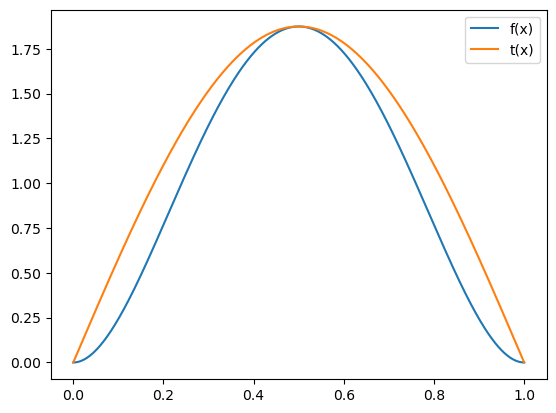

In [37]:
# Código del estudiante 1 Daniel

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Definir la función de densidad f(x)
def f(x):
    return 30 * (x**2 - 2*x**3 + x**4)

# Calcular el valor máximo de la función de densidad f(x)
res = minimize_scalar(lambda x: -f(x), bounds = (0, 1), method = "bounded")
a = f(res.x)

# Definir la función t(x)
def t(x):
    return a * np.sin(np.pi * x)

# Generar una muestra de 1000 valores aleatorios utilizando la distribución inversa transformada
u = np.random.uniform(0, 1, size = 1000)
x = np.power(u, 1/3)

# Calcular la evaluación de la función t(x) en la muestra de valores aleatorios generados
y = t(x)

# Graficar ambas funciones en la misma gráfica
x_vals = np.linspace(0, 1, 1000)
f_vals = f(x_vals)
t_vals = t(x_vals)

plt.plot(x_vals, f_vals, label = "f(x)")
plt.plot(x_vals, t_vals, label = "t(x)")
plt.legend()
plt.show()

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

In [38]:
# Código del estudiante 1 Daniel

\begin{gathered}
g(x)=\frac{t(x)}{C} \\
C=\int_0^1 t(x) d x \\
C=\int a \sin (\pi x) d x=\frac{-a}{\pi} \cos (\pi x) \\
\left.\int_0^1 a \sin (\pi x) d x-\left[\frac{-a}{\pi} \cos (\pi)\right]-\mid \frac{-a}{\pi} \cos (0)\right] \\
{\left[\frac{-a}{\pi} \cos (-1)\right]-\left[\frac{-a}{\pi} \cos (1)\right]} \\
C=\frac{2 a}{\pi} \\
g(x)-\frac{a \sin (\pi x)}{\frac{2 \pi}{\pi}} \\
g(x)=\frac{\sin (\pi x)}{\frac{2}{\pi}}
\end{gathered}

3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

In [39]:
# Código del estudiante 1 Daniel

$$g(x) = \frac{t(x)}{c} = \frac{a\sin(\pi x)}{\int_{-\infty}^{\infty}a\sin(\pi x)dx}=$$


$$\frac{a\sin(\pi x)}{\int_{0}^{1}a\sin(\pi x)dx} = $$

$$\frac{a\sin(\pi x)}{\frac{2a}{\pi}} = \frac{\pi \sin(\pi x)}{2} $$


$$g(x) = \frac{\pi \sin(\pi x)}{2} $$
En este caso, se desea generar variables aleatorias que sigan la distribución de probabilidad $g(x)$, que se define como:

$$g(x) = \frac{\pi \sin(\pi x)}{2}$$

Para aplicar la técnica de la inversa transformada, primero es necesario encontrar la función de distribución acumulada $G(x)$. Esto se hace integrando la función de densidad $g(x)$:

$$G(x) = \int_{-\infty}^x g(t) dt$$

Para esta función de densidad, la integral puede evaluarse de la siguiente manera:

$$G(x) = \int_{0}^x \frac{\pi \sin(\pi t)}{2} dt = \frac{1}{2}\left[-\cos(\pi t)\right]_0^x = \frac{1}{2}(-\cos(\pi x) + 1)$$

Para generar variables aleatorias que sigan la distribución $g(x)$, se sigue el siguiente algoritmo utilizando la función de distribución acumulada obtenida:

Generar una muestra de $N$ valores aleatorios uniformes $U$ en el intervalo $(0,1)$.
Aplicar la función inversa $G^{-1}(U)$ a cada valor generado en el paso anterior.
Los valores obtenidos en el paso anterior siguen la distribución $g(x)$.
La función inversa de $G(x)$ se obtiene despejando $x$ de la ecuación $G(x) = U$:

$$\frac{1}{2}(-\cos(\pi x) + 1) = U$$

$$-\cos(\pi x) + 1 = 2U$$

$$\cos(\pi x) = -2U + 1$$

$$x = \frac{\arccos(-2U + 1)}{\pi}$$

Por lo tanto, se pueden generar $N$ valores aleatorios que sigan la distribución $g(x)$ aplicando esta función inversa a una muestra de $N$ valores aleatorios uniformes $U$ en el intervalo $(0,1)$.

4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada.

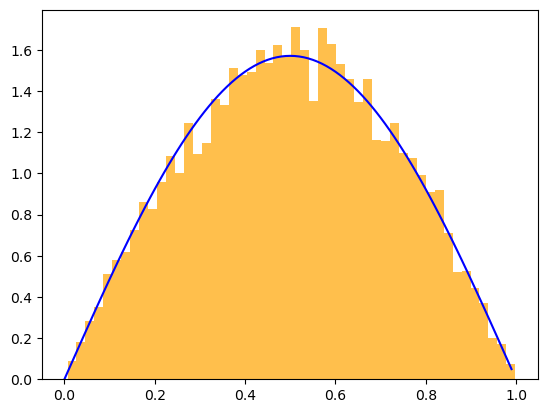

In [40]:
# Código del estudiante 1 Daniel

g = lambda x: np.sin(np.pi * x) / (2 / np.pi)
F = 1/2 * (-np.cos(np.pi * x) + 1) 
inv_F = (1 / np.pi)*np.arccos(1 - 2 * x) 
x2 = np.arange(0, 1, 0.01)
n = 10000
# Definimos la funcion inversa de CDF
def inv_cdf(y):
    return (1/np.pi)*np.arccos(1 - 2*y)

# Generamos las variables aleatorias uniformes
u = np.random.uniform(size=n)

# Aplicamos la funcion inversa para obtener las variabel aleatorias
x = inv_cdf(u)

plt.hist(x, bins = 50, density = True, alpha = 0.7, color = "orange")
plt.plot(x2, g(x2), "b", label = "t(x)")
plt.plot()
plt.show()

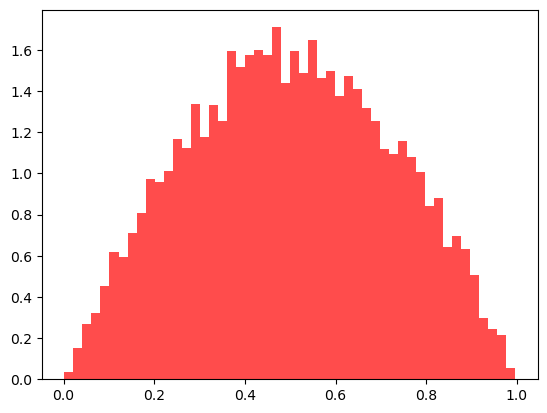

In [41]:
# Código del estudiante 1 Daniel

gx = np.sin(np.pi * x) / (2 / np.pi)
Fx = 1 / 2 * (-np.cos(np.pi * x) + 1) 
inv_Fx = (1/np.pi) * np.arccos(1 - 2 * x) 

# Definimos la funcion inversa de CDF
def inv_cdf(y):
    return (1/np.pi) * np.arccos(1 - 2 * y)

# Generamos las variables aleatorias uniformes
u = np.random.uniform(size = 10000)

# Aplicamos la funcion inversa para obtener las variabel aleatorias
x = inv_cdf(u)

plt.hist(x, bins = 50, density = True, alpha = 0.7, color = "red")
plt.show()

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados.

El máximo de f es: [1.875]


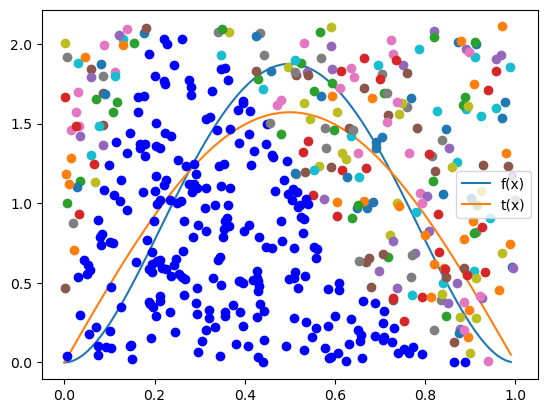

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [42]:
# Código del estudiante 1 Daniel

f = lambda x: 30*(x**2 - 2*x**3 + x**4)

max_f = f(optimize.fmin(lambda x:-f(x), 0, disp = False))

t = lambda x: np.sin(np.pi * x)/(2/np.pi)

# Rango donde se graficará las funciones
x = np.arange(0, 1, 0.01)
print("El máximo de f es:", max_f)

# Gráficas de las funciones
plt.plot(x, f(x), label = "f(x)")
plt.plot(x, t(x), label = "t(x)")
plt.legend()

# Validación del método
N = 500 # puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

# Prueba de función creada
Acep_rechazo(R2, R1, f, t)

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

In [43]:
# Código del estudiante 1 Daniel

def Acep_rechazo(R2: "Variables distribuidas en g(x)",
         R1: "Variables distribuidas U~U(0,1)",
         f: "Función objetivo",
         t: "Función que maximiza f",
         N: "Número de simulaciones"):
    fx= f(R1)
    tx= t(R1)
    cond= tx * R2 <= fx
    return print(f'Tu porcentaje de aceptación es de: {sum(cond)/N}')
N = 10000 
R2 = np.random.rand(N)
R1 = np.random.rand(N)

#funcion sin senos
t1 = lambda x: (max_f * np.ones(len(x)))

#Función t(x) senoidal
Acep_rechazo(R2, R1, f, t, 10000)
#Función t(x) sin seno 
Acep_rechazo(R2, R1, f, t1, 10000)

Tu porcentaje de aceptación es de: 0.7704
Tu porcentaje de aceptación es de: 0.527


7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

El máximo de f es: [2.109375]


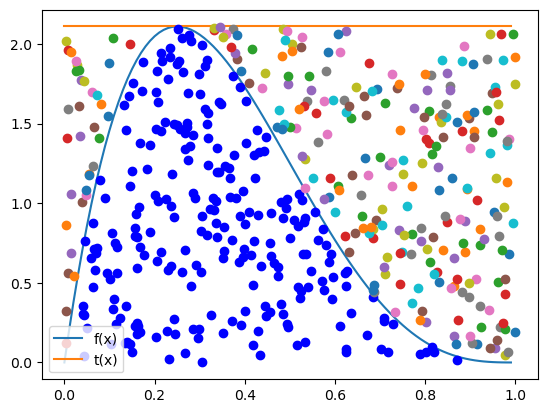

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [44]:
# Código del estudiante 1 Daniel

def Acep_rechazo(R2:"Variables distruidas U~U(0,1)",
                 R1:"Variables distribuidas como g(x)",
                 f: "función objetivo a generar",
                 t: "función que mayora a f"):
    # R1 = np.random.rand
    f_x2 = f2(R1)
    t_x2 = t2(R1)
    condition = R2 * t_x2 <= f_x2
    [plt.plot(R1[i], R2[i] *t_x2[i], "ob") if condition[i] else plt.plot(R1[i], R2[i] * t_x2[i], "o") \
         for i in range(len(R1))]
                
    plt.show()
    
    return x
    

# Función objetivo 
f2 = lambda x: 20 * x* (1-x)**3
# Máximo de la función f
max_f2 = f2(optimize.fmin(lambda x:-f2(x), 0, disp = False))
# Función t -> Función constante
t2 =lambda x:  max_f2* np.ones(len(x))
# Rango donde se graficará las funciones
x = np.arange(0, 1, 0.01)
print("El máximo de f es:", max_f2)


N = 500 
R2 = np.random.rand(N)
R1 = np.random.rand(N)
plt.plot(x, f2(x), label = "f(x)")
plt.plot(x, t2(x), label = "t(x)")
plt.legend()
Acep_rechazo(R2, R1, f2, t2)

8. Demostrar la validez de la siguiente ecuación
$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i$$

9. Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$

Demuestre matemáticamente que 
 $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
 y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.